In [ ]:
# Summary
# Loading and examining data: Loaded the dataset and checked its structure and content.
# Handling missing values: Filled missing values in categorical and numerical columns.
# Data type conversion: Ensured appropriate data types for analysis.
# Exploratory Data Analysis (EDA): Created visualizations to understand distributions, relationships, and summary statistics.
# Saving cleaned data: Saved the cleaned data for future use.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
file_path = 'C:/Users/paula/OneDrive/Desktop/databases/Yerevan-Hotels.csv'

In [12]:
hotels_df = pd.read_csv(file_path)

In [14]:
df = hotels_df

In [16]:
# Display the first few rows of the dataset

In [18]:
print(df.head())

                       Hotel Names  Star Rating  Rating Free Parking  \
0                     Kenut Hostel          NaN     9.7          Yes   
1                    Kantar Hostel          NaN     9.3          Yes   
2               Sweet Sleep hostel          NaN     9.5          Yes   
3  Royal Boutique Hotel on Kievyan          NaN     7.4          Yes   
4                       Areg Hotel          3.0     8.2           No   

  Fitness Centre Spa and Wellness Centre Airport Shuttle  Staff  Facilities  \
0             No                      No              No    9.9         9.8   
1             No                      No             Yes    9.7         9.4   
2             No                      No              No    9.8         9.5   
3             No                      No             Yes    8.1         7.3   
4             No                      No              No    9.1         8.0   

   Location  Comfort  Cleanliness  Price Per Day($)  
0       8.8      9.7          9.8     

In [20]:
# Check for missing values

In [22]:
print(df.isnull().sum())

Hotel Names                 0
Star Rating                41
Rating                      5
Free Parking                0
Fitness Centre              0
Spa and Wellness Centre     0
Airport Shuttle             0
Staff                       5
Facilities                  5
Location                    5
Comfort                     5
Cleanliness                 5
Price Per Day($)            0
dtype: int64


In [24]:
# Fill missing values for categorical columns with mode

In [26]:
categorical_cols = ['Hotel Names', 'Free Parking', 'Fitness Centre', 'Spa and Wellness Centre', 'Airport Shuttle']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0])

In [28]:
# Fill missing values for numerical columns with mean

In [30]:
numerical_cols = ['Star Rating', 'Rating', 'Staff', 'Facilities', 'Location', 'Comfort', 'Cleanliness', 'Price Per Day($)']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

In [32]:
# Convert columns to appropriate data types

In [34]:
df['Star Rating'] = df['Star Rating'].astype(int)
df['Price Per Day($)'] = df['Price Per Day($)'].astype(float)

In [36]:
# Verify no missing values remain

In [38]:
print(df.isnull().sum())

Hotel Names                0
Star Rating                0
Rating                     0
Free Parking               0
Fitness Centre             0
Spa and Wellness Centre    0
Airport Shuttle            0
Staff                      0
Facilities                 0
Location                   0
Comfort                    0
Cleanliness                0
Price Per Day($)           0
dtype: int64


In [40]:
# Display summary statistics

In [42]:
print(df.describe())

       Star Rating      Rating       Staff  Facilities    Location  \
count   120.000000  120.000000  120.000000  120.000000  120.000000   
mean      3.508333    8.794783    9.261739    8.761739    8.913043   
std       0.660988    0.758242    0.522692    0.887503    0.778117   
min       2.000000    5.000000    7.500000    2.500000    7.000000   
25%       3.000000    8.500000    9.100000    8.400000    8.400000   
50%       3.000000    8.900000    9.300000    8.800000    8.913043   
75%       4.000000    9.300000    9.600000    9.300000    9.600000   
max       5.000000   10.000000   10.000000   10.000000   10.000000   

          Comfort  Cleanliness  Price Per Day($)  
count  120.000000   120.000000        120.000000  
mean     8.936522     8.936522         77.200000  
std      0.728684     0.756743         61.391203  
min      5.000000     5.000000          6.000000  
25%      8.700000     8.700000         40.000000  
50%      9.100000     9.100000         62.500000  
75%      9.4

In [44]:
# Distribution of Star Ratings

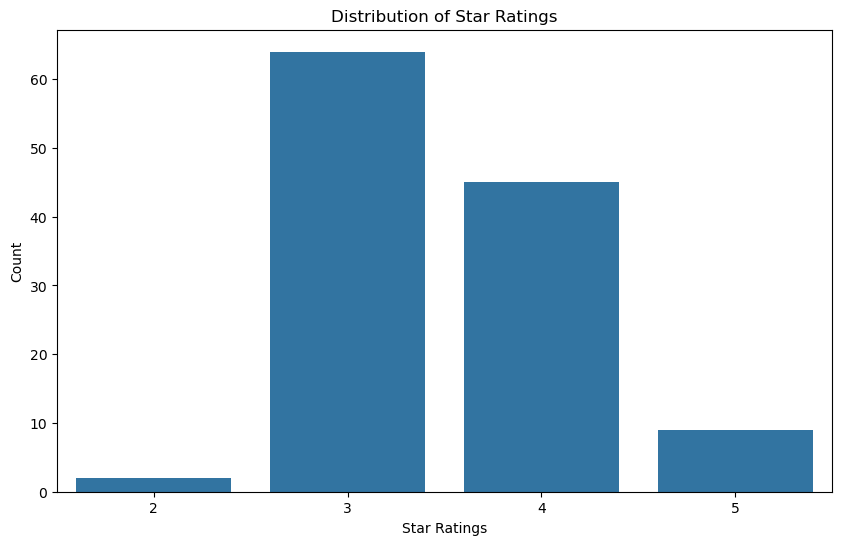

In [50]:
plt.figure(figsize=(10,6))
sns.countplot(x='Star Rating', data=df)
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Ratings')
plt.ylabel('Count')
plt.show()

In [ ]:
# Distribution of Price Per Day

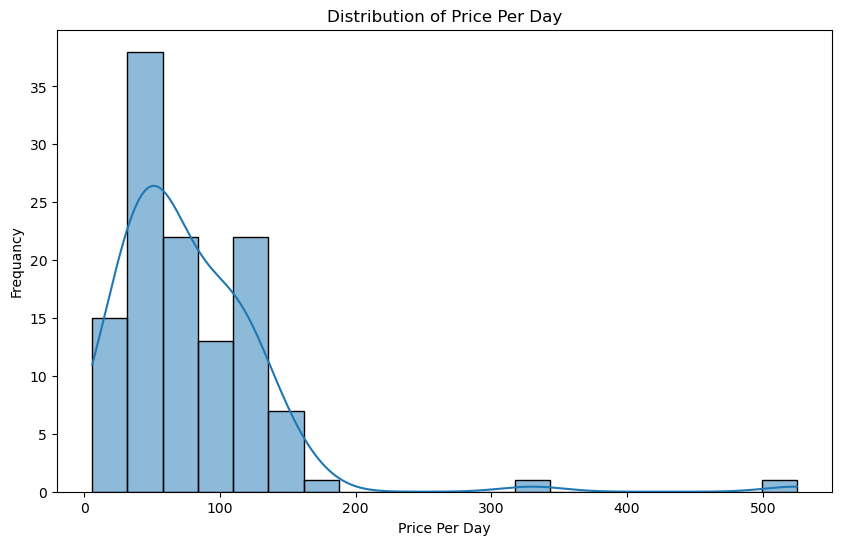

In [52]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price Per Day($)'], bins=20,kde=True)
plt.title('Distribution of Price Per Day')
plt.xlabel('Price Per Day')
plt.ylabel('Frequancy')
plt.show()

In [ ]:
# Correlation Matrix

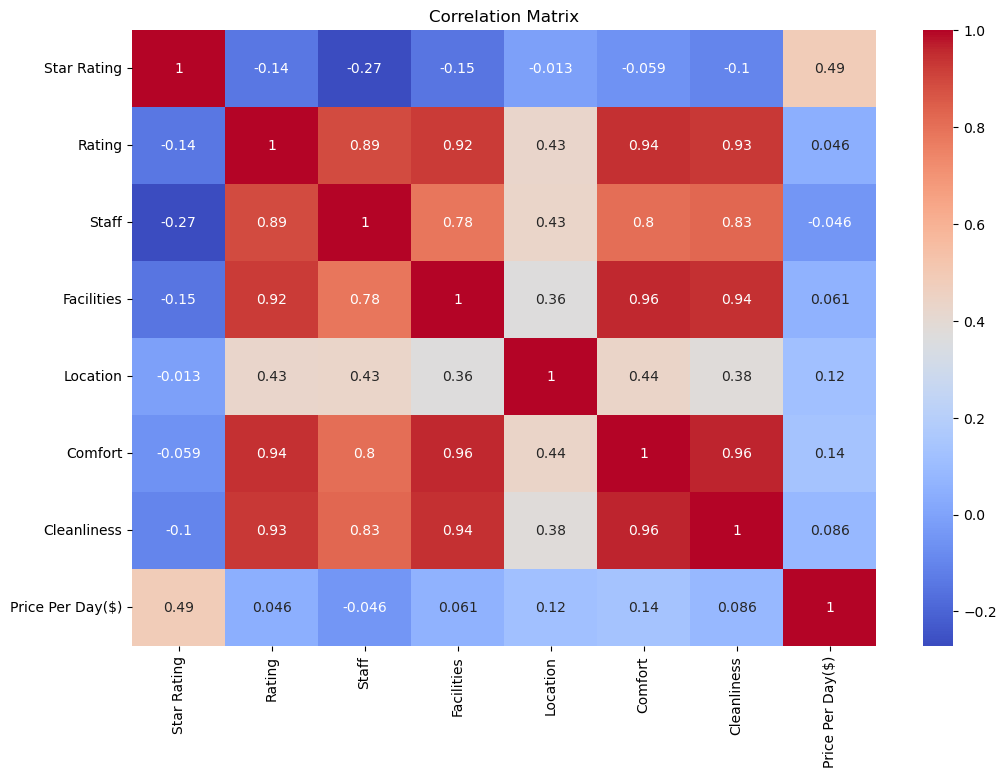

In [58]:
plt.figure(figsize=(12,8))
numericl_cols = ['Start Rating', 'Rating', 'Staff', 'Facilities', 'Location', 'Comfort', 'Cleanliness', 'Price Per Day($)']
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Average Ratings by Start Ratings

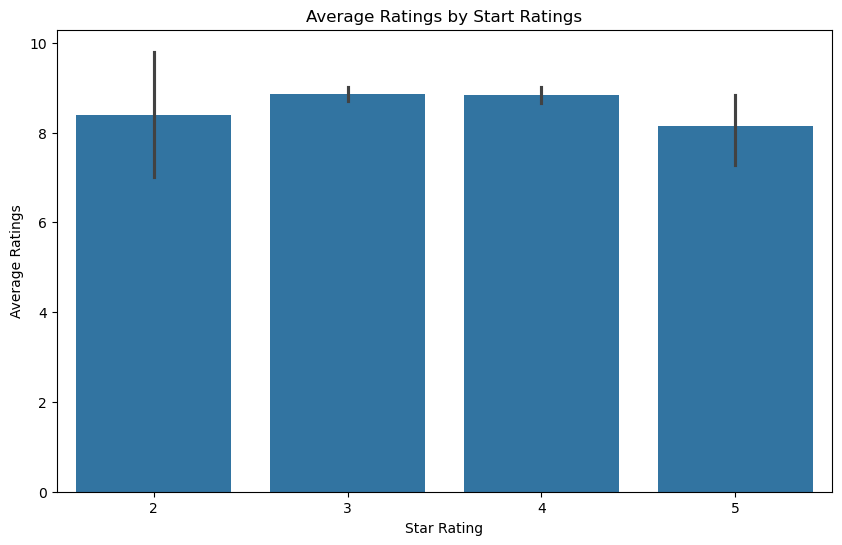

In [66]:
plt.figure(figsize=(10,6))
sns.barplot(x='Star Rating', y='Rating', data=df)
plt.title('Average Ratings by Start Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Average Ratings')
plt.show()

In [ ]:
# Boxplot of Price Per Day by Start Ratings

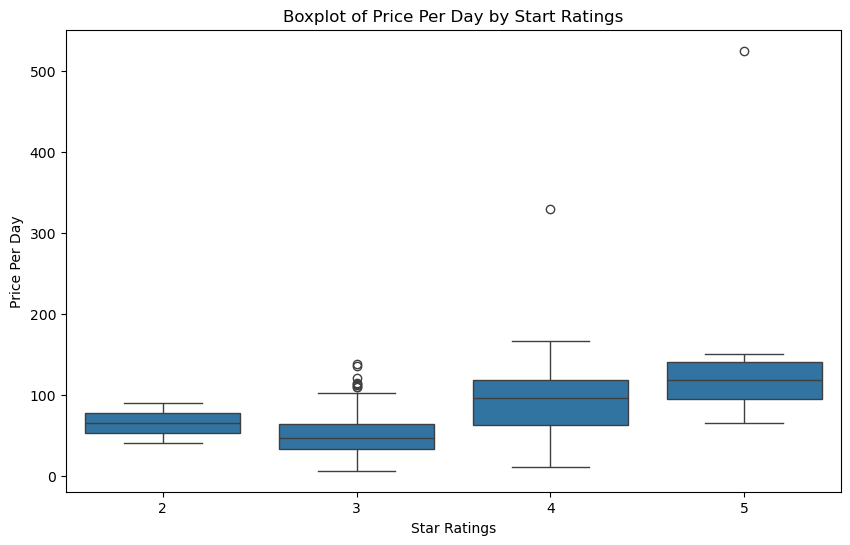

In [76]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Star Rating', y='Price Per Day($)', data=df)
plt.title('Boxplot of Price Per Day by Start Ratings')
plt.xlabel('Star Ratings')
plt.ylabel('Price Per Day')
plt.show()

In [ ]:
# Save the cleaned dataset to a new CSV file

In [78]:
df.to_csv('cleaned_hotels.csv', index=False)